In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [2]:
def select_points(image, window_name):
    points = []
    def mouse_callback(event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN:
            points.append((x, y))
            cv2.circle(image, (x, y), 5, (0, 255, 0), -1)
            cv2.imshow(window_name, image)

    cv2.imshow(window_name, image)
    cv2.setMouseCallback(window_name, mouse_callback)
    cv2.waitKey(0)
    cv2.destroyWindow(window_name)
    return points


In [3]:
frame_image = cv2.imread('Leeds/frame_7093.png')  # Frame del video
map_image = cv2.imread('Leeds/Satellite.png')      # Immagine della mappa

print("Seleziona i punti nel frame del video")
frame_points = select_points(frame_image, "Frame Video")
print("Seleziona i punti nella mappa")
map_points = select_points(map_image, "Mappa")

# Controlla che ci siano almeno 4 punti
if len(frame_points) < 4 or len(map_points) < 4:
    print("Devi selezionare almeno 4 punti in entrambe le immagini")
    exit()


Seleziona i punti nel frame del video
Seleziona i punti nella mappa


In [4]:
# Converti i punti in float32
frame_points = np.array(frame_points, dtype=np.float32)
map_points = np.array(map_points, dtype=np.float32)

# Calcola la matrice omografica
H, status = cv2.findHomography(map_points, frame_points)


In [5]:
# Creare descrittori per visualizzazione
def create_keypoints(points):
    keypoints = []
    for point in points:
        keypoints.append(cv2.KeyPoint(point[0], point[1], 1))
    return keypoints

def draw_manual_matches(img1, points1, img2, points2):
    keypoints1 = create_keypoints(points1)
    keypoints2 = create_keypoints(points2)
    
    matches = []
    for i in range(len(points1)):
        matches.append(cv2.DMatch(i, i, 0))
    
    matched_image = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches, None, 
                                    matchColor=(0, 255, 0), singlePointColor=(255, 0, 0))
    return matched_image


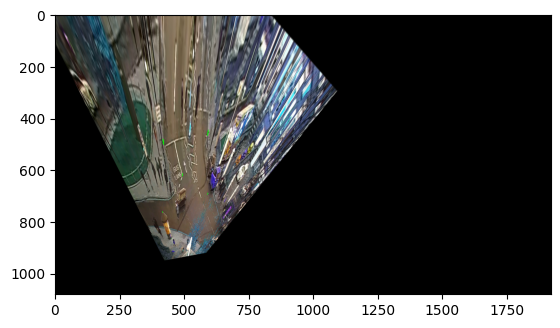

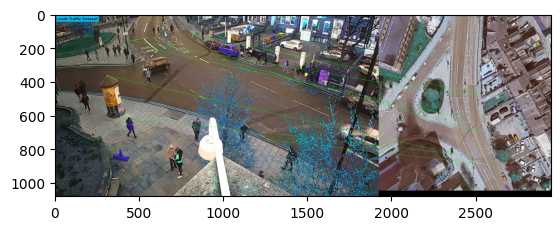

(<matplotlib.image.AxesImage at 0x21fe69ebd90>, None)

In [6]:
# Applica la trasformazione inversa (se vuoi trasformare la mappa verso il frame del video)
height, width, channels = frame_image.shape
warped_image = cv2.warpPerspective(frame_image, np.linalg.inv(H), (width, height))

# Mostra l'immagine trasformata
plt.imshow(warped_image, 'gray'),plt.show()

# Mostra l'immagine con i match disegnati
matched_image = draw_manual_matches(frame_image, frame_points, map_image, map_points)
plt.imshow(matched_image, 'gray'),plt.show()



In [7]:
# Salva la matrice omografica su un file
np.save('Leeds/homography_matrix.npy', H)
print(H)

[[ 9.25016491e-01 -4.66007927e-01  5.21354260e+01]
 [-8.73979284e-02  7.68633375e-02  7.22312103e+01]
 [-2.49551450e-04 -8.35675799e-04  1.00000000e+00]]
